In [8]:
import pandas as pd
from Bio import SeqIO, Seq
import plotly.express as px

In [13]:
# Comparing wgsim with 0% and 3% error rates.
df_0 = pd.read_csv("../testing_jelly/sim0/kmer_summation.tsv", sep="\t")
df_0["err"] = 0

df_003 = pd.read_csv("../testing_jelly/sim003/kmer_summation.tsv", sep="\t")
df_003["err"] = 0.03
df_tot = pd.concat([df_0, df_003])
df_tot["err_str"] = df_tot["err"].astype(str)

df_tot["corrected"] = df_tot["Depth median"] / ((1 - df_tot["err"])**21)

{0.5274805126389446, 1.0}

In [14]:
df_tot

Contig    count  Depth avg        std   min   25%  \
0     NC_014328.1.region003  20725.0   9.421472   4.270547   1.0   7.0   
1   NZ_CP053893.1.region002  19844.0  19.584408  53.261970   0.0   1.0   
2   NZ_CP020566.1.region001  21701.0  45.706004   7.803356  21.0  41.0   
3   NZ_LT906470.1.region002  32242.0  14.138019   9.450253   1.0  10.0   
4   NZ_CP053893.1.region005  65902.0   2.827152   1.868469   0.0   1.0   
5   NZ_CP053893.1.region004  19578.0   2.810706   2.125914   0.0   1.0   
6   NZ_CP053893.1.region006  20740.0   3.626905   2.476691   0.0   2.0   
7   NZ_LT906470.1.region003  21739.0  12.901007   6.963051   3.0  10.0   
8     NC_014328.1.region005  21570.0  10.633565  17.513982   1.0   7.0   
9     NC_014328.1.region004  22066.0   9.870117  16.906533   2.0   7.0   
10  NZ_LT906470.1.region001  26313.0  13.678600   7.141649   3.0  10.0   
11  NZ_CP053893.1.region003  20341.0   2.865493   3.161065   0.0   1.0   
12  NZ_LT906445.1.region001  21700.0  13.113548  14.236004   1.0   6.0   
13    NC_014328.1.region002  19019.0   9.642568   4.371692   1.0   7.0   
14  NZ_CP053893.1.region001  21538.0   2.751045   1.649418   0.0   2.0   
15    NC_014328.1.region001  18086.0   9.211158   6.072443   2.0   7.0   
0     NC_014328.1.region003  20725.0   1.958649   1.656690   0.0   1.0   
1   NZ_CP053893.1.region002  19844.0  18.140395  34.277576   0.0   3.0   
2   NZ_CP020566.1.region001  21701.0  24.283167   5.719983   8.0  20.0   
3   NZ_LT906470.1.region002  32242.0   5.135196   5.567549   0.0   3.0   
4   NZ_CP053893.1.region005  65902.0   3.679448   1.938702   0.0   2.0   
5   NZ_CP053893.1.region004  19578.0   3.799520   2.295307   0.0   2.0   
6   NZ_CP053893.1.region006  20740.0   4.586548   2.537093   0.0   3.0   
7   NZ_LT906470.1.region003  21739.0   4.955518   3.863981   0.0   3.0   
8     NC_014328.1.region005  21570.0   2.087112   3.731628   0.0   1.0   
9     NC_014328.1.region004  22066.0   2.021118   3.472309   0.0   1.0   
10  NZ_LT906470.1.region001  26313.0   5.247368   4.050837   0.0   3.0   
11  NZ_CP053893.1.region003  20341.0   3.909444   3.937786   0.0   2.0   
12  NZ_LT906445.1.region001  21700.0   9.131613   8.142839   0.0   5.0   
13    NC_014328.1.region002  19019.0   1.982018   1.738382   0.0   1.0   
14  NZ_CP053893.1.region001  21538.0   3.411134   1.821419   0.0   2.0   
15    NC_014328.1.region001  18086.0   2.124461   1.725171   0.0   1.0   

    Depth median    75%    max  count_nonzero  count_unique  \
0            9.0  11.00   42.0          20725         20725   
1            3.0   7.00  414.0          17976         19844   
2           46.0  51.00   92.0          21701         21701   
3           13.0  16.00  133.0          32242         32242   
4            3.0   4.00   18.0          60810         65902   
5            2.0   4.00   28.0          17548         19578   
6            3.0   5.00   15.0          19593         20740   
7           12.0  15.00   80.0          21739         21739   
8            9.0  11.00  400.0          21570         21570   
9            8.0  10.75  400.0          22066         22066   
10          13.0  15.00   81.0          26313         26313   
11           3.0   4.00  105.0          18431         20341   
12           8.0  11.00   80.0          21700         21700   
13           9.0  12.00   38.0          19019         19019   
14           3.0   4.00   33.0          20554         21538   
15           9.0  11.00  323.0          18086         18086   
0            2.0   3.00   14.0          17180         20725   
1            4.0   8.00  260.0          19545         19844   
2           24.0  28.00   55.0          21701         21701   
3            4.0   6.00   86.0          31859         32242   
4            4.0   5.00   20.0          64170         65902   
5            3.0   5.00   20.0          18918         19578   
6            4.0   6.00   18.0          20357         20740   
7            4.0   6.00   48.0          21416         21739   
8  

In [15]:
df_plot = df_tot.melt(id_vars=["Contig", "err_str"], value_vars=["Depth median","corrected"])
expected = (0.2*10**9) / 16859816

In [20]:
fig = px.scatter(df_plot, x="Contig", y="value", color="err_str", symbol="variable",
                title="Comparing estimates at different error rates>")
fig.add_hline(y=expected)

In [31]:
import glob
from pathlib import Path

In [33]:
Path("../testing_jelly/sim003/counts/NC_014328.1.region003.counted").parent.parent.name

'sim003'

In [57]:
# Lets look at the histograms of counts:
dfs = []
for file in glob.glob("../testing_jelly/sim0*/counts/*"):
    file = Path(file)
    df_i = pd.read_csv(file, sep = " ", names=["mer", "count"])
    df_i["contig"] = file.stem
    df_i["dataset"] = file.parent.parent.name
    dfs.append(df_i)
df_counts = pd.concat(dfs)

In [60]:
err_dict = {"sim003":0.03, "sim0":0}
df_counts["err"] = [err_dict[x] for x in df_counts["dataset"]]
df_counts["counts_corrected"] = df_counts["count"] / ((1-df_counts["err"])**21)
df_counts

mer  count                 contig dataset   err  \
0      CATACCCTTTACCTCGTCCCA      1  NC_014328.1.region003  sim003  0.03   
1      TAAGCCTCATCAAATTTTCCA      3  NC_014328.1.region003  sim003  0.03   
2      GTGTGGAACAATGCTGACAAA      3  NC_014328.1.region003  sim003  0.03   
3      ATTACTATTTCAATTTGTTCA      3  NC_014328.1.region003  sim003  0.03   
4      TTCACCAATACATATTTAGAA      0  NC_014328.1.region003  sim003  0.03   
...                      ...    ...                    ...     ...   ...   
18081  ATAATTTTTTTTGTTTTCATG     14  NC_014328.1.region001    sim0  0.00   
18082  TAGCTATGGTAACTTTAATAA     12  NC_014328.1.region001    sim0  0.00   
18083  CACCTGAATAGACTTTTTATG     10  NC_014328.1.region001    sim0  0.00   
18084  TAATCAAATAATTTATCGTCA     10  NC_014328.1.region001    sim0  0.00   
18085  AAAGAAGGTGTTCCCATATCA     12  NC_014328.1.region001    sim0  0.00   

       corrected  counts_corrected  
0       1.895805          1.895805  
1       5.687414          5.687414  
2       5.687414          5.687414  
3       5.687414          5.687414  
4       0.000000          0.000000  
...          ...               ...  
18081  14.000000         14.000000  
18082  12.000000         12.000000  
18083  10.000000         10.000000  
18084  10.000000         10.000000  
18085  12.000000         12.000000  

[786208 rows x 7 columns]

In [59]:
fig = px.histogram(df_counts.query("contig == 'NC_014328.1.region003'"),
                   x="count", color="dataset", histnorm="probability", marginal='violin')
#fig.update_layout(xaxis_range=[0,200])
fig.add_vline(expected)

In [65]:
fig = px.histogram(df_counts.query("contig == 'NC_014328.1.region003'"),
                   x="counts_corrected", color="dataset", histnorm="probability", marginal='violin',
                   nbins =40
                  )
#fig.update_layout(xaxis_range=[0,200])
fig.add_vline(expected)

In [55]:
# Load "true" coverage
df_true = pd.read_csv("../testing_trueCount/genome1.cov", sep="\t", names=["contig", "pos","cov"])

In [51]:
df_true.head(5)

contig  pos  cov
0  NC_014328.1    1    0
1  NC_014328.1    2    0
2  NC_014328.1    3    0
3  NC_014328.1    4    0
4  NC_014328.1    5    0

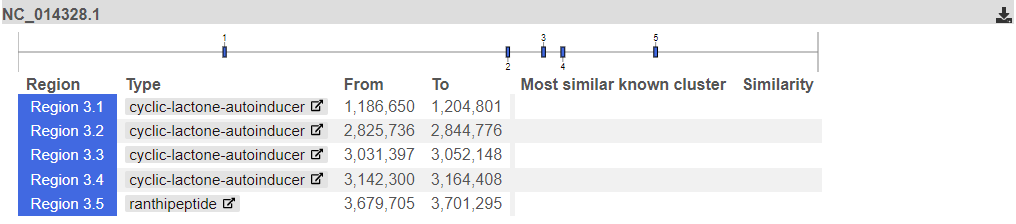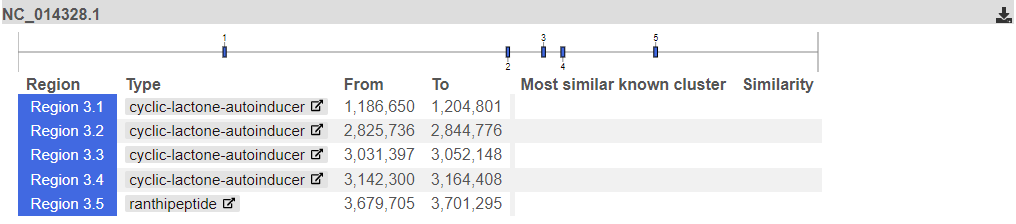

In [56]:
df_true[1186650:1204801].describe()

pos           cov
count  1.815100e+04  18151.000000
mean   1.195726e+06     12.530880
std    5.239887e+03      3.809965
min    1.186651e+06      3.000000
25%    1.191188e+06     10.000000
50%    1.195726e+06     12.000000
75%    1.200264e+06     15.000000
max    1.204801e+06     26.000000

In [57]:
df_true.describe()

pos           cov
count  4.630065e+06  4.630065e+06
mean   2.315033e+06  1.186248e+01
std    1.336585e+06  3.777545e+00
min    1.000000e+00  0.000000e+00
25%    1.157517e+06  9.000000e+00
50%    2.315033e+06  1.200000e+01
75%    3.472549e+06  1.400000e+01
max    4.630065e+06  3.300000e+01

In [53]:
1.016319e+01

10.16319

In [49]:
pd.read_csv("../testing_jelly/kat-sect-stats.tsv", sep="\t")

seq_name  median      mean  \
0   NC_014328.1.region004 ['cyclic-lactone-autoind...       6   7.02037   
1   NZ_CP053893.1.region001 ['ranthipeptide'] NZ_C...       5   5.55638   
2   NZ_LT906470.1.region001 ['betalactone'] NZ_LT9...       6   6.26375   
3   NZ_CP053893.1.region004 ['cyclic-lactone-autoi...       6   6.55813   
4   NZ_CP053893.1.region003 ['cyclic-lactone-autoi...       6   6.14273   
5   NZ_CP053893.1.region002 ['cyclic-lactone-autoi...       7  27.65061   
6   NZ_CP053893.1.region005 ['cyclic-lactone-autoi...       6   5.85124   
7   NC_014328.1.region003 ['cyclic-lactone-autoind...       6   6.45230   
8   NZ_CP053893.1.region006 ['cyclic-lactone-autoi...       6   7.16302   
9   NC_014328.1.region001 ['cyclic-lactone-autoind...       6   6.49167   
10  NC_014328.1.region005 ['ranthipeptide'] NC_014...       6   6.69413   
11  NZ_LT906470.1.region002 ['betalactone'] NZ_LT9...       6   6.37787   
12  NZ_LT906470.1.region003 ['ranthipeptide'] NZ_L...       6   6.15215   
13  NC_014328.1.region002 ['cyclic-lactone-autoind...       6   6.14479   
14  NZ_LT906445.1.region001 ['ranthipeptide'] NZ_L...       6   6.68862   
15  NZ_CP020566.1.region001 ['ranthipeptide'] NZ_C...       6   6.80738   

        gc%  seq_length  kmers_in_seq  invalid_kmers  %_invalid  \
0   0.29712       22109         22089              0        0.0   
1   0.29122       21561         21541              0        0.0   
2   0.40413       26333         26313              0        0.0   
3   0.28421       19598         19578              0        0.0   
4   0.28401       20394         20374              0        0.0   
5   0.33288       19866         19846              0        0.0   
6   0.29680       66040         66020              0        0.0   
7   0.27843       20752         20732              0        0.0   
8   0.27278       20760         20740              0        0.0   
9   0.27380       18152         18132              0        0.0   
10  0.31277       21591         21571              0        0.0   
11  0.44759       32264         32244              0        0.0   
12  0.41644       21775         21755              0        0.0   
13  0.28817       19041         19021              0        0.0   
14  0.37334       21720         21700              0        0.0   
15  0.37857       21721         21701              0        0.0   

    non_zero_kmers  %_non_zero  %_non_zero_corrected  
0            22033    99.74648              99.74648  
1            21396    99.32687              99.32687  
2            26273    99.84798              99.84798  
3            19497    99.58627              99.58627  
4            20302    99.64661              99.64661  
5            19812    99.82868              99.82868  
6            65874    99.77885              99.77885  
7            20668    99.69130              99.69130  
8            20646    99.54677              99.54677  
9            18120    99.93382              99.93382  
10           21497    99.65695              99.65695  
11           32132    99.65265              99.65265  
12           21727    99.87129              99.87129  
13           18991    99.84228              99.84228  
14           21641    99.72811              99.72811  
15           21658    99.80185              99.80185

In [6]:
# "simulate" reads - first as fasta.

comb_fasta = SeqIO.parse(open("../testing_jelly/combined.fa","r"), "fasta")

In [11]:
next(comb_fasta).seq.__str__()

'TATATATTTTTATAAGTTTTTTTCGGATAGTTTAGAAAAGTTATCCACATTTTTTCTCTTTTGACCTGTGAATAGTATAAACTCAGTATTTATAAGGTTGGAAGGGAATTTTATTTTCTCTTATTCACAAGTTGTGCACAGGTTATTCACAGGCATTTGTGGTTTTTCCACAGTTTTAGAATAAGTTATGCACATAATAACGAAAGTTATACACATTTTTAGTAAAAGTTATACACAAGAGGAACAAAATGCAAGCAGCTGATATTAATGATATATGGGAACGTATATTACAAGTAGCAAAACAAACACTGCCGCCTGCGATTTATTCAAGTTTGAGTACTTCTCTCATACCGATGAGTATAGATAATAATTCTATACACATTGGGGTTATGCAGAGTTTTATAAAAAGTGTCATCGAATCTCAGCAAACGGTAAGTAAGTTGTTAACAGATGCCATCAAGCAAGTGACAGGCAAAGAATTAAATATGGTTTTATTGGATCTGTTTCCACAAAAGGATGATATTCCAACAGCACCGCAGGTAGCAGATACTTTCACAGAGAATACTGCAGAAAATACTAGTACGAACACTATAGAAAATACGGTGGTAAGTGACGCGGACAACATCGATAAAAAATCCTCAAAACCTGCAAAGCAGGAGGTTCCATATCAAGAGGAATTTTACACACCGGTGTACGCAGATCCTGTGTATATCCAGCGTAAAGAGGTGGACGAGTTAATTCCAGATGAACCGATGTTTCCTGTAGAGCAGCCACAAATGGTGCAAACGTTGCAATCTACGGATATTCCTATCGATTTGTCATCGTCACAGCTAAACAGTGGTTATCGATTTGATAATTACATTACAGGCAATGCGAACCGCATTCCGTTTGGAGCAGCCCAAAATGTGTCGGAGCATCCTGGCGGCGATTATAATCCGCTTTTTATCTACGGTCCATCGGGCCTCGGTAAAACGCATTTGATGCACGCCATCGGCAATG

In [43]:
4 % 2 == 0

True

In [39]:
Seq.Seq("ATGCAAAGTTTTATAAAAAACTTGATTGATCAGCAGCCCGTCATCAGTAATGCATTACAAAATGCGATTACCACCGTGCTCGGATCCCAT").reverse_complement().__str__()

'ATGGGATCCGAGCACGGTGGTAATCGCATTTTGTAATGCATTACTGATGACGGGCTGCTGATCAATCAAGTTTTTTATAAAACTTTGCAT'

In [38]:
c

'ATGGGATCCGAGCACGGTGGTAATCGCATTTTGTAATGCATTACTGATGACGGGCTGCTGATCAATCAAGTTTTTTATAAAACTTTGCAT'

In [27]:
df_count = pd.read_csv("../data/simulated_data/quantification_kmer/0_2GB/counts/NC_014328.1.region001.counted", sep=" ", names=["mer","mercount"])

In [20]:
import plotly.express as px

In [28]:
px.histogram(df_count, "mercount")

In [25]:
k = 18
df_count["rolling_cov"] = [sum(df_count["mercount"].values[max(i-k+1,0):i+1])/k for i in range(len(df_count))]

In [26]:
px.histogram(df_count, "rolling_cov")